> **Prices for Audi cars. R2 score: 0.9537**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/audi.csv')
print('Dataset \n',data.head(3))
print('*************************************************')
print('Dataset Shape :',data.shape)
print('*************************************************')
print('Dataset Columns :\n',data.columns)

Dataset 
   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
*************************************************
Dataset Shape : (10668, 9)
*************************************************
Dataset Columns :
 Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


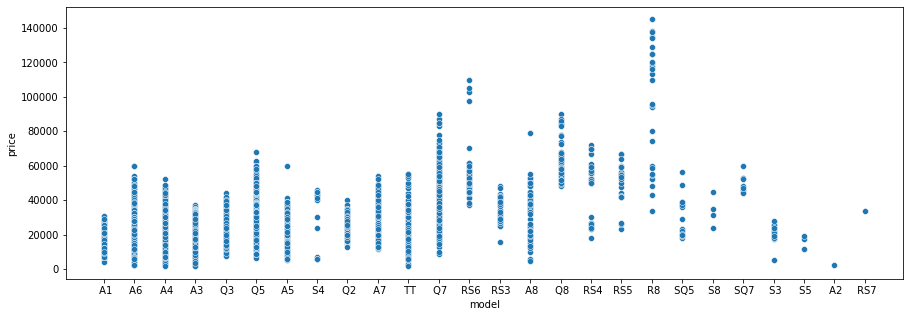

In [3]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='model',y='price',data=data)
plt.show()

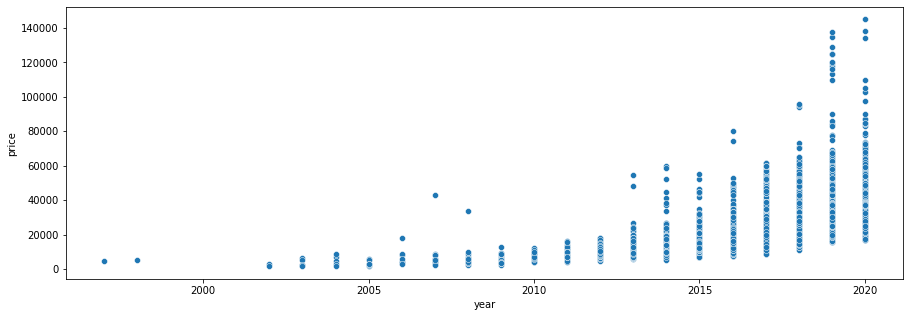

In [4]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='year',y='price',data=data)
plt.show()

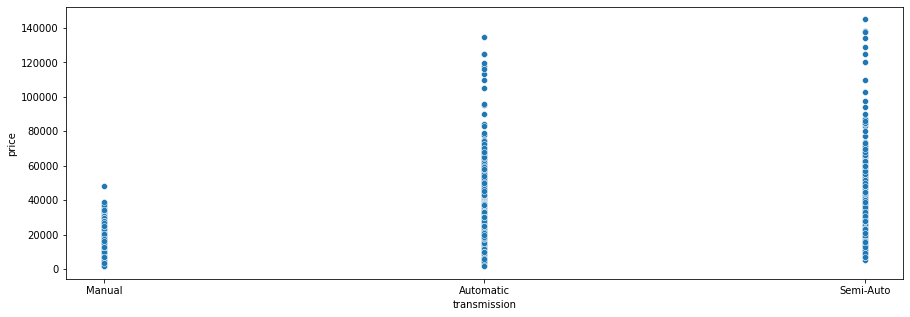

In [5]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='transmission',y='price',data=data)
plt.show()

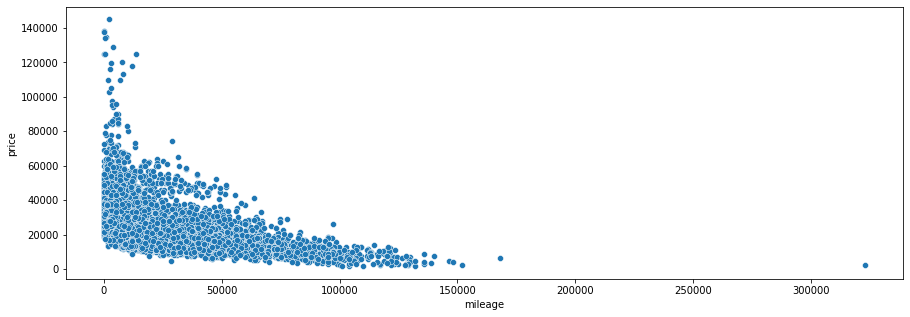

In [6]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='mileage',y='price',data=data)
plt.show()

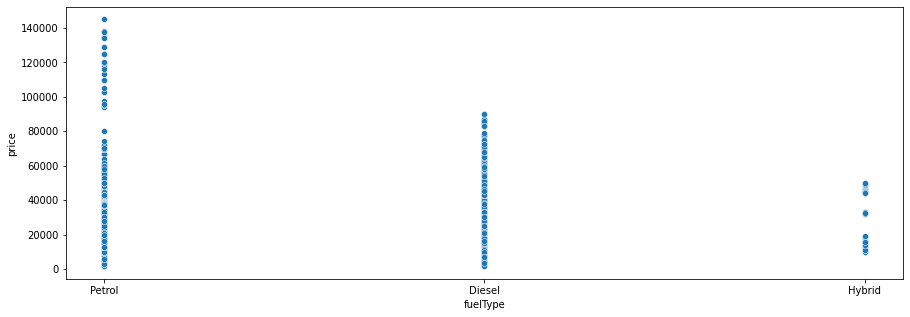

In [7]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='fuelType',y='price',data=data)
plt.show()

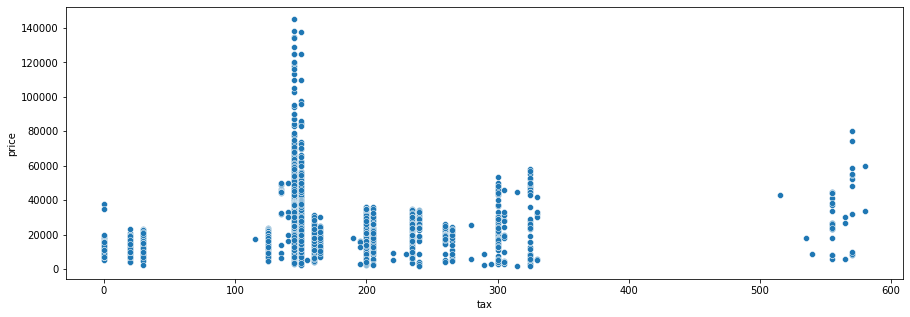

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='tax',y='price',data=data)
plt.show()

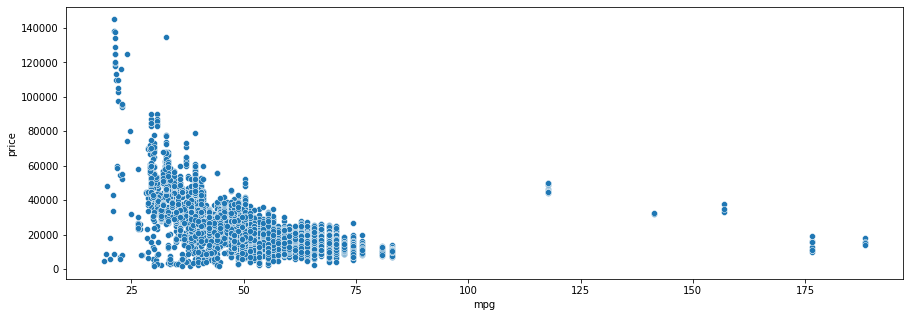

In [9]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='mpg',y='price',data=data)
plt.show()

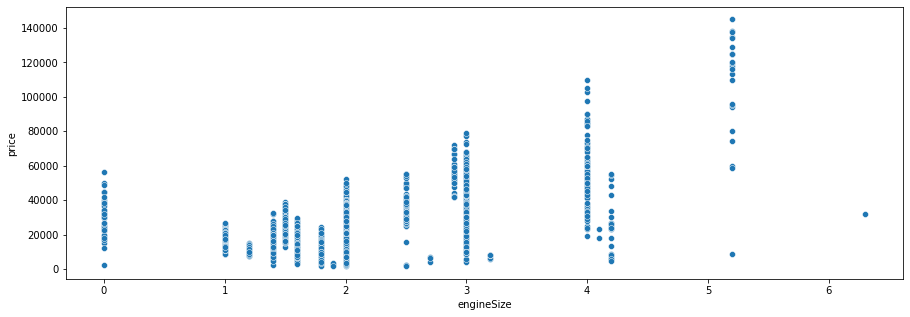

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='engineSize',y='price',data=data)
plt.show()

In [11]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:>

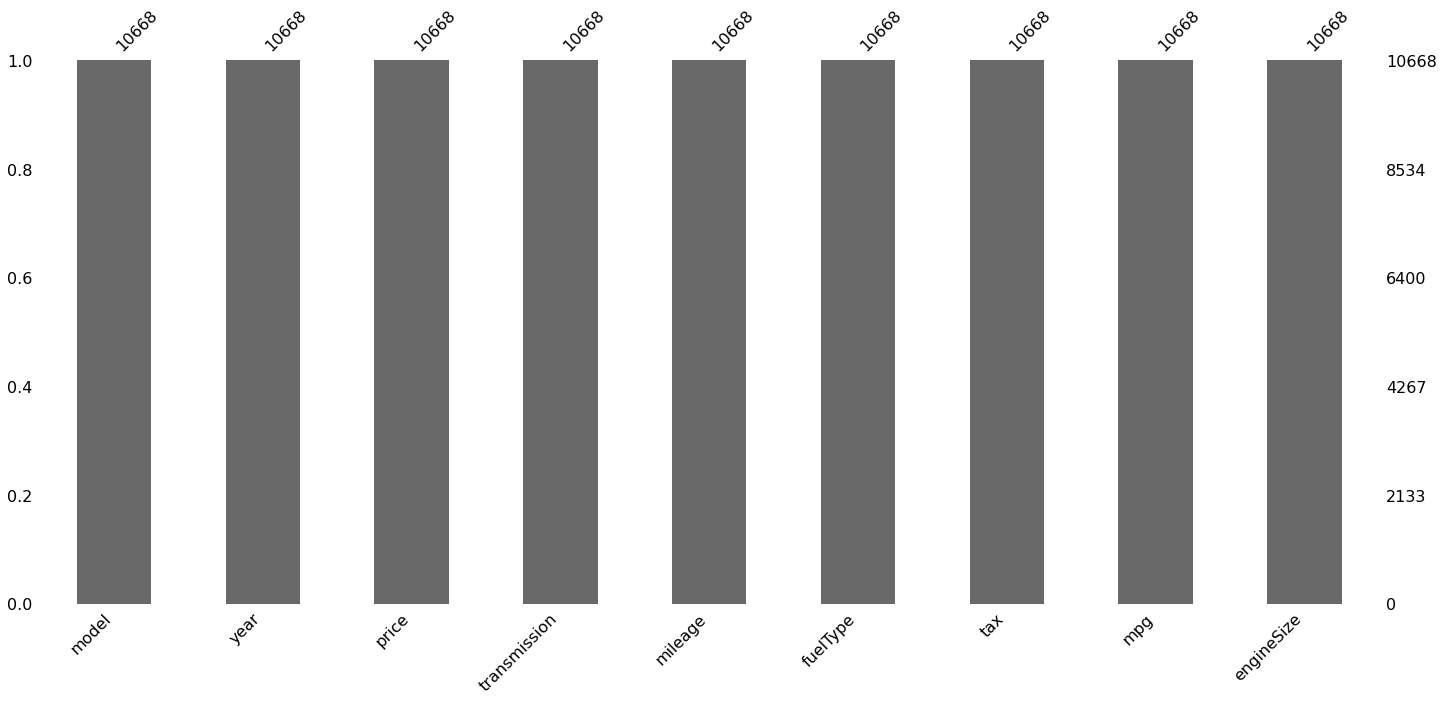

In [12]:
import missingno as msngo
msngo.bar(data)

In [13]:
num = data.select_dtypes('number').columns.to_list()
cat = data.select_dtypes('object').columns.to_list()

num_feature = data[num]
cat_feature = data[cat]

print('Num Feature',num_feature.columns)
print('***********************************************************************')
print('Cat Feature',cat_feature.columns)

Num Feature Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
***********************************************************************
Cat Feature Index(['model', 'transmission', 'fuelType'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['model'] = le.fit_transform(data['model'])
data['transmission'] = data['transmission'].map({'Manual':0,'Automatic':1,'Semi_Auto':2})
data['fuelType'] = data['fuelType'].map({'Petrol':0,'Diesel':1,'Hybrid':2})

In [15]:
data = pd.concat([data, pd.get_dummies(data['model'], prefix='model')], axis=1)
data = pd.concat([data, pd.get_dummies(data['transmission'], prefix='transmission')], axis=1)
data = pd.concat([data, pd.get_dummies(data['fuelType'], prefix='fuelType')], axis=1)

In [16]:
data = data.drop(['model','transmission','fuelType'],axis=1)

In [17]:
data

,year,price,mileage,tax,mpg,engineSize,model_0,model_1,model_2,model_3,...,model_21,model_22,model_23,model_24,model_25,transmission_0.0,transmission_1.0,fuelType_0,fuelType_1,fuelType_2
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10664,2020,16999,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10665,2020,17199,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10666,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [18]:
y = data['price']
data = data.drop('price',axis=1,inplace=False)
X = data

In [19]:
import statsmodels.api as sm
model_OLS = sm.OLS(y, X).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2577.
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:16:14   Log-Likelihood:            -1.0322e+05
No. Observations:               10668   AIC:                         2.065e+05
Df Residuals:                   10633   BIC:                         2.068e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
year              1818.8568     30.102     60.423      0.000    1759.851    1877.863
mileage             -0.0792      0.003    -28.657      0.000      -0.085      -0.074
tax                -29.0047      0.821    -35.345      0.000     -30.613     -27.396
mpg               -288.1955      6.522    -44.187      0.000    -300.980    -275.411
engineSize        4441.8924    122.596     36.232      0.000    4201.580    4682.204
model_0          -3.857e+05   6308.962    -61.130      0.000   -3.98e+05   -3.73e+05
model_1          -3.666e+05   7095.833    -51.661      0.000    -3.8e+05   -3.53e+05
model_2          -3.844e+05   6315.964    -60.859      0.000   -3.97e+05   -3.72e+05
model_3           -3.84e+05   6326.868    -60.700      0.000   -3.96e+05   -3.72e+05
model_4          -3.827e+05   6322.649    -60.524      0.000   -3.95e+05    -3.7e+05
model_5          -3.821e+05   6323.166    -60.433      0.000   -3.95e+05    -3.7e+05
model_6           -3.81e+05   6325.051    -60.241      0.000   -3.93e+05   -3.69e+05
model_7          -3.774e+05   6321.691    -59.706      0.000    -3.9e+05   -3.65e+05
model_8          -3.843e+05   6329.023    -60.713      0.000   -3.97e+05   -3.72e+05
model_9          -3.828e+05   6314.074    -60.622      0.000   -3.95e+05    -3.7e+05
model_10         -3.789e+05   6313.329    -60.012      0.000   -3.91e+05   -3.67e+05
model_11         -3.706e+05   6328.824    -58.551      0.000   -3.83e+05   -3.58e+05
model_12         -3.606e+05   6338.421    -56.899      0.000   -3.73e+05   -3.48e+05
model_13         -3.249e+05   6370.356    -50.994      0.000   -3.37e+05   -3.12e+05
model_14         -3.758e+05   6354.736    -59.137      0.000   -3.88e+05   -3.63e+05
model_15         -3.642e+05   6369.992    -57.175      0.000   -3.77e+05   -3.52e+05
model_16         -3.661e+05   6366.548    -57.507      0.000   -3.79e+05   -3.54e+05
model_17         -3.586e+05   6365.433    -56.343      0.000   -3.71e+05   -3.46e+05
model_18         -3.666e+05   7380.438    -49.678      0.000   -3.81e+05   -3.52e+05
model_19         -3.806e+05   6356.310    -59.882      0.000   -3.93e+05   -3.68e+05
model_20         -3.761e+05   6363.470    -59.108      0.000   -3.89e+05   -3.64e+05
model_21         -3.836e+05   6625.942    -57.891      0.000   -3.97e+05   -3.71e+05
model_22         -3.782e+05   6606.594    -57.253      0.000   -3.91e+05   -3.65e+05
model_23         -3.759e+05   6392.448    -58.806      0.000   -3.88e+05   -3.63e+05
model_24         -3.665e+05   6468.586    -56.654      0.000   -3.79e+05   -3.54e+05
model_25         -3.821e+05   6305.974    -60.599      0.000   -3.94e+05    -3.7e+05
transmission_0.0 -1629.2353    102.029    -15.968      0.000   -1829.231   -1429.240
transmission_1.0   -97.0415    100.440     -0.966      0.334    -293.922      99.839
fuelType_0       -3.252

In [20]:
p_value = pd.DataFrame(model_OLS.pvalues, columns = ['pvalues'])
p_value = p_value.style.format({'pvalues': '{:.7f}'})

In [21]:
p_value

,pvalues
year,0.0000000
mileage,0.0000000
tax,0.0000000
mpg,0.0000000
engineSize,0.0000000
model_0,0.0000000
model_1,0.0000000
model_2,0.0000000
model_3,0.0000000
model_4,0.0000000


In [22]:
data = data.drop(['transmission_1.0'],axis=1)

In [23]:
X = data

In [24]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    Cross_Validation1 = cross_validate(model, X, y, cv=5, return_train_score=True)
    CrossValidateValues2 = cross_validate(model,X,y,cv=5,scoring=('r2','neg_mean_squared_error'),return_train_score = True)

    print('Train Score Value : ', Cross_Validation1['train_score'])
    print('Test Score Value : ', Cross_Validation1['test_score'])
    print('*********************************************************************************************')
    print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
    print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
    print('*********************************************************************************************')
    print('Train R2 Value : ', CrossValidateValues2['train_r2'])
    print('Test R2 Value : ', CrossValidateValues2['test_r2'])
    print('*********************************************************************************************')

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    cv_score = np.abs(np.mean(cv_score))
    print("CV Mean Square Errors [MSE] :", cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))
    print("CV R2 :", np.mean(cv_score_r2))
    print('*********************************************************************************************')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred) 
    print('Mean Absolute Error Value in Model is : ', MAE)

    MSE = mean_squared_error(y_test, y_pred) 
    print('Mean Squared Error Value in Model is : ', MSE)
    
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value in Model is : ',RMSE)

    r2 = r2_score(y_test,y_pred)
    print('R2 Value in Model is : ',r2)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr, X, y)

Train Score Value :  [0.89214383 0.88892829 0.88907397 0.89831734 0.89350629]
Test Score Value :  [0.88656129 0.90010843 0.87117993 0.84638918 0.85771376]
*********************************************************************************************
Train MSE Value :  [-15723949.96503962 -15314845.87457853 -13603940.98028028
 -14319075.60360211 -14533229.17345435]
Test MSE Value :  [-11510891.08079598 -13443276.50318908 -20603805.55405281
 -18663756.61121455 -18250279.63357066]
*********************************************************************************************
Train R2 Value :  [0.89214383 0.88892829 0.88907397 0.89831734 0.89350629]
Test R2 Value :  [0.88656129 0.90010843 0.87117993 0.84638918 0.85771376]
*********************************************************************************************
CV Mean Square Errors [MSE] : 16494401.876564616
CV Root Mean Square Errors [RMSE] : 4061.3300624997983
CV R2 : 0.8723905196584962
**************************************************

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
train(dt, X, y)

Train Score Value :  [0.94611656 0.93892302 0.93844257 0.94530836 0.94373562]
Test Score Value :  [0.90356581 0.91870974 0.91892684 0.90942331 0.89980896]
*********************************************************************************************
Train MSE Value :  [-7855466.30666965 -8421447.88639927 -7549388.00587422 -7701743.32505423
 -7678417.03640593]
Test MSE Value :  [ -9664526.72693272 -10939937.2323013  -13053602.25208985
 -10768216.42259961 -13334604.30351504]
*********************************************************************************************
Train R2 Value :  [0.94611656 0.93892302 0.93844257 0.94530836 0.94373562]
Test R2 Value :  [0.90475703 0.91870974 0.91838566 0.9113729  0.89603827]
*********************************************************************************************
CV Mean Square Errors [MSE] : 12582971.944971452
CV Root Mean Square Errors [RMSE] : 3547.2485034138012
CV R2 : 0.9062497558512984
*******************************************************

In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=10,n_estimators=40,min_samples_split=12)
train(rf, X, y)

Train Score Value :  [0.96629827 0.96452071 0.96448906 0.96646245 0.96285953]
Test Score Value :  [0.93770246 0.9507166  0.94356934 0.94062023 0.90277709]
*********************************************************************************************
Train MSE Value :  [-4887581.88145458 -4828717.54561846 -4515494.45054341 -4808435.95491272
 -5037365.01255022]
Test MSE Value :  [ -6347722.13973895  -6632130.33875665  -9407719.06690416
  -7505500.17147906 -12945426.35842911]
*********************************************************************************************
Train R2 Value :  [0.96647434 0.96497948 0.96318083 0.96585432 0.9630882 ]
Test R2 Value :  [0.93744382 0.95071931 0.94118062 0.93822647 0.89907245]
*********************************************************************************************
CV Mean Square Errors [MSE] : 8583556.57789645
CV Root Mean Square Errors [RMSE] : 2929.7707381118494
CV R2 : 0.9343201588282838
*********************************************************

<AxesSubplot:ylabel='features'>

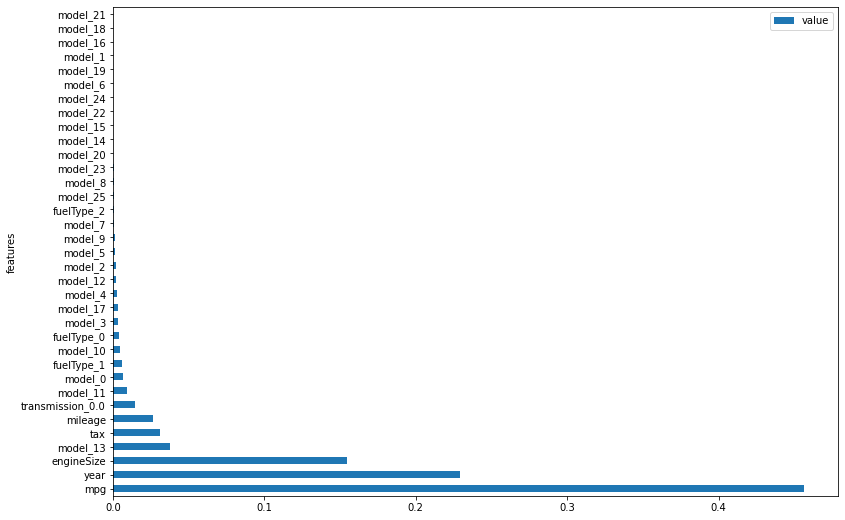

In [28]:
feat_import = pd.DataFrame(rf.feature_importances_, columns = ['value'])
features = pd.DataFrame(X.columns, columns = ['features'])
feat_import = pd.concat([features, feat_import], axis=1)
feat_import.sort_values('value', ascending=False, inplace=True)
feat_import.plot.barh(x ='features', figsize=(13, 9))